In [1]:
from preprocess.preprocess import load_dataset, compute_label_agg, select_data, get_data_loaders, undersample

import torch
import torch.nn as nn
import torch.optim as optim

from models.CNN import *
from utils.trainer import trainer
from utils.RNN_utils import plot_losses, rename_with_acc

d:\SUTD\T6\DL Project\Deep_Learning_ECGclassification\utils\RNN_utils.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# Define device for torch
use_cuda = True
device = torch.device("cuda" if (
    use_cuda and torch.cuda.is_available()) else "cpu")
print(device)

cuda


# Define options


In [3]:
EPOCH = 20
LOAD_DATASET = False
TRAIN_PATH = './PTB_train.pt'
VALID_PATH = './PTB_valid.pt'
TEST_PATH = './PTB_test.pt'
SAVE_DIR = './CNN_model_saves/'
BATCH_SIZE = 256

# Loading the main dataset


In [4]:
if LOAD_DATASET:
    train_loader = torch.load(TRAIN_PATH)
    valid_loader = torch.load(VALID_PATH)
    test_loader = torch.load(TEST_PATH)
else:
    path = './data/ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.3/'

    data, raw_labels = load_dataset(path)

    labels = compute_label_agg(raw_labels, path)

    data, labels, y = select_data(data, labels)

    data, labels, y = undersample(data, labels, y)

    train_loader, valid_loader, test_loader = get_data_loaders(
        data, labels, y, BATCH_SIZE)

    # torch.save(train_loader, TRAIN_PATH)
    # torch.save(valid_loader, VALID_PATH)
    # torch.save(test_loader, TEST_PATH)

# Loading the augmented data loaders

In [5]:
train_loader_rm = torch.load('./trainloader_augmented_rm.pt')
valid_loader_rm = torch.load('./validloader_augmented_rm.pt')
test_loader_rm = torch.load('./testloader_augmented_rm.pt')

# train_loader_rn = torch.load('./trainloader_augmented_rn.pt')
# valid_loader_rn = torch.load('./validloader_augmented_rn.pt')
# test_loader_rn = torch.load('./testloader_augmented_rn.pt')

# Combining the undersampled dataset with the Random Masking augmented dataset

In [6]:
combined_train_rm_ds = torch.utils.data.ConcatDataset([train_loader.dataset, train_loader_rm.dataset])
combined_valid_rm_ds = torch.utils.data.ConcatDataset([valid_loader.dataset, valid_loader_rm.dataset])
combined_test_rm_ds = torch.utils.data.ConcatDataset([test_loader.dataset, test_loader_rm.dataset])

combined_rm_train_loader = torch.utils.data.DataLoader(combined_train_rm_ds, batch_size=BATCH_SIZE, shuffle=True)
combined_rm_valid_loader = torch.utils.data.DataLoader(combined_valid_rm_ds, batch_size=BATCH_SIZE)
combined_rm_test_loader = torch.utils.data.DataLoader(combined_test_rm_ds, batch_size=BATCH_SIZE)

# Training the model


In [7]:
SAVE_NAME =  f'CNN_undersampled_augmented_rm_epoch_{EPOCH}'

model = CNN().to(device)
lr = 0.0001

train_accs, valid_accs, test_acc = trainer(model, combined_rm_train_loader, combined_rm_test_loader, combined_rm_valid_loader, lr = lr, num_epochs = EPOCH, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

# model = train_RNN(EPOCH, train_loader, valid_loader, model,
#                   criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

cuda
Epoch [1/20], Step [10/62], Train Loss: 0.5973
Epoch [1/20], Train Accuracy: 0.3266
Epoch [1/20], Validation Accuracy: 0.3364, Validation Loss: 0.6029
Model saved to ==> ./CNN_model_saves/model_CNN_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [20/62], Train Loss: 0.5804
Epoch [1/20], Train Accuracy: 0.3457
Epoch [1/20], Validation Accuracy: 0.4056, Validation Loss: 0.5894
Model saved to ==> ./CNN_model_saves/model_CNN_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [30/62], Train Loss: 0.5774
Epoch [1/20], Train Accuracy: 0.3651
Epoch [1/20], Validation Accuracy: 0.4300, Validation Loss: 0.5755
Model saved to ==> ./CNN_model_saves/model_CNN_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [40/62], Train Loss: 0.5567
Epoch [1/20], Train Accuracy: 0.3828
Epoch [1/20], Validation Accuracy: 0.4158, Validation Loss: 0.5680
Model saved to ==> ./CNN_model_saves/model_CNN_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [50/62], Train Loss: 0.5666
Epoc

# Evaluate and plot losses


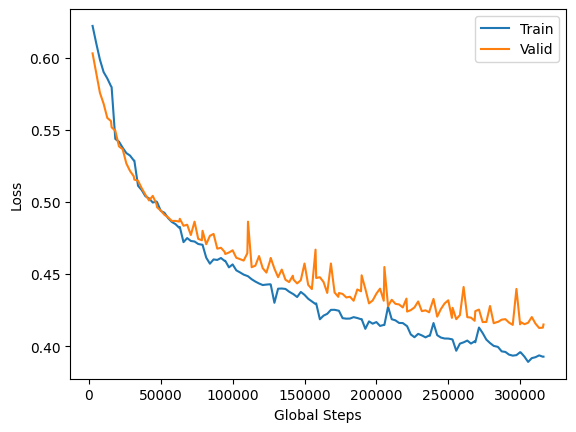

In [8]:
# test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(save_dir=SAVE_DIR, metrics_save_name=SAVE_NAME)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_acc)

# Training the model


In [9]:
SAVE_NAME =  f'MMCNN_CAT_undersampled_augmented_rm_epoch_{EPOCH}'

model = MMCNN_CAT().to(device)
lr = 0.0001

train_accs, valid_accs, test_acc = trainer(model, combined_rm_train_loader, combined_rm_test_loader, combined_rm_valid_loader, lr = lr, num_epochs = EPOCH, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

# model = train_RNN(EPOCH, train_loader, valid_loader, model,
#                   criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

cuda
Epoch [1/20], Step [10/62], Train Loss: 0.5912
Epoch [1/20], Train Accuracy: 0.4195
Epoch [1/20], Validation Accuracy: 0.5059, Validation Loss: 0.5807
Model saved to ==> ./CNN_model_saves/model_MMCNN_CAT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [20/62], Train Loss: 0.5591
Epoch [1/20], Train Accuracy: 0.5053
Epoch [1/20], Validation Accuracy: 0.5557, Validation Loss: 0.5544
Model saved to ==> ./CNN_model_saves/model_MMCNN_CAT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [30/62], Train Loss: 0.5294
Epoch [1/20], Train Accuracy: 0.5357
Epoch [1/20], Validation Accuracy: 0.5639, Validation Loss: 0.5284
Model saved to ==> ./CNN_model_saves/model_MMCNN_CAT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [40/62], Train Loss: 0.5113
Epoch [1/20], Train Accuracy: 0.5611
Epoch [1/20], Validation Accuracy: 0.6102, Validation Loss: 0.5132
Model saved to ==> ./CNN_model_saves/model_MMCNN_CAT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [50/62],

# Evaluate and plot losses


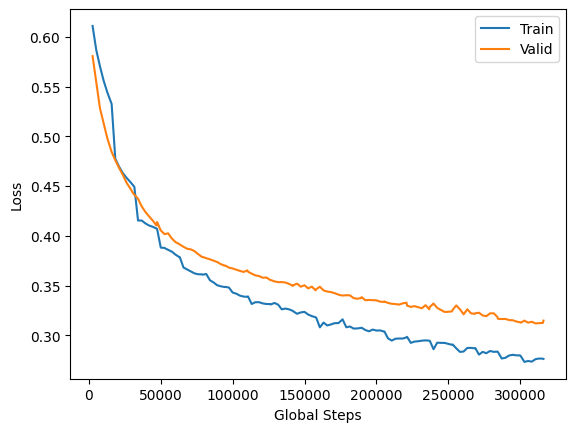

In [10]:
# test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(save_dir=SAVE_DIR, metrics_save_name=SAVE_NAME)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_acc)

# Training the model


In [11]:
SAVE_NAME =  f'MMCNN_ATT_undersampled_augmented_rm_epoch_{EPOCH}'

model = MMCNN_ATT().to(device)
lr = 0.0001

train_accs, valid_accs, test_acc = trainer(model, combined_rm_train_loader, combined_rm_test_loader, combined_rm_valid_loader, lr = lr, num_epochs = EPOCH, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

# model = train_RNN(EPOCH, train_loader, valid_loader, model,
#                   criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

cuda
Epoch [1/20], Step [10/62], Train Loss: 0.6012
Epoch [1/20], Train Accuracy: 0.3145
Epoch [1/20], Validation Accuracy: 0.3430, Validation Loss: 0.5916
Model saved to ==> ./CNN_model_saves/model_MMCNN_ATT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [20/62], Train Loss: 0.5791
Epoch [1/20], Train Accuracy: 0.3541
Epoch [1/20], Validation Accuracy: 0.4224, Validation Loss: 0.5678
Model saved to ==> ./CNN_model_saves/model_MMCNN_ATT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [30/62], Train Loss: 0.5737
Epoch [1/20], Train Accuracy: 0.3831
Epoch [1/20], Validation Accuracy: 0.4158, Validation Loss: 0.5532
Model saved to ==> ./CNN_model_saves/model_MMCNN_ATT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [40/62], Train Loss: 0.5462
Epoch [1/20], Train Accuracy: 0.4075
Epoch [1/20], Validation Accuracy: 0.4601, Validation Loss: 0.5479
Model saved to ==> ./CNN_model_saves/model_MMCNN_ATT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [50/62],

# Evaluate and plot losses


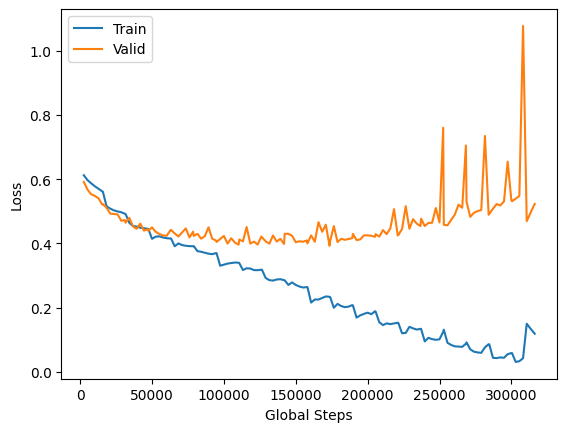

In [12]:
# test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(save_dir=SAVE_DIR, metrics_save_name=SAVE_NAME)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_acc)

# Training the model


In [13]:
SAVE_NAME =  f'MMCNN_SUM_Dropout_batchnorm_undersampled_augmented_rm_epoch_{EPOCH}'

model = MMCNN_SUM().to(device)
lr = 0.0001

train_accs, valid_accs, test_acc = trainer(model, combined_rm_train_loader, combined_rm_test_loader, combined_rm_valid_loader, lr = lr, num_epochs = EPOCH, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

# model = train_RNN(EPOCH, train_loader, valid_loader, model,
#                   criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

cuda
Epoch [1/20], Step [10/62], Train Loss: 0.5869
Epoch [1/20], Train Accuracy: 0.3891
Epoch [1/20], Validation Accuracy: 0.4794, Validation Loss: 0.5707
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_Dropout_batchnorm_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [20/62], Train Loss: 0.5182
Epoch [1/20], Train Accuracy: 0.5068
Epoch [1/20], Validation Accuracy: 0.5812, Validation Loss: 0.4971
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_Dropout_batchnorm_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [30/62], Train Loss: 0.4007
Epoch [1/20], Train Accuracy: 0.5840
Epoch [1/20], Validation Accuracy: 0.7099, Validation Loss: 0.4451
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_Dropout_batchnorm_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [40/62], Train Loss: 0.3976
Epoch [1/20], Train Accuracy: 0.6315
Epoch [1/20], Validation Accuracy: 0.7344, Validation Loss: 0.4277
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_Dropout_bat

# Evaluate and plot losses


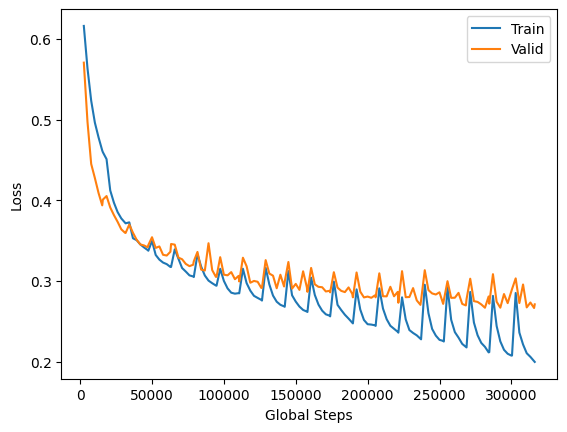

In [14]:
# test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(save_dir=SAVE_DIR, metrics_save_name=SAVE_NAME)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_acc)

# Training the model


In [15]:
SAVE_NAME =  f'MMCNN_SUM_ATT_undersampled_augmented_rm_epoch_{EPOCH}'

model = MMCNN_SUM_ATT().to(device)
lr = 0.0001

train_accs, valid_accs, test_acc = trainer(model, combined_rm_train_loader, combined_rm_test_loader, combined_rm_valid_loader, lr = lr, num_epochs = EPOCH, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

# model = train_RNN(EPOCH, train_loader, valid_loader, model,
#                   criterion, optimizer, device=device, save_dir=SAVE_DIR, model_save_name=SAVE_NAME)

cuda
Epoch [1/20], Step [10/62], Train Loss: 0.5111
Epoch [1/20], Train Accuracy: 0.4648
Epoch [1/20], Validation Accuracy: 0.5425, Validation Loss: 0.5231
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_ATT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [20/62], Train Loss: 0.4351
Epoch [1/20], Train Accuracy: 0.5711
Epoch [1/20], Validation Accuracy: 0.6351, Validation Loss: 0.4626
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_ATT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [30/62], Train Loss: 0.4078
Epoch [1/20], Train Accuracy: 0.6258
Epoch [1/20], Validation Accuracy: 0.7181, Validation Loss: 0.4294
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_ATT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20], Step [40/62], Train Loss: 0.3775
Epoch [1/20], Train Accuracy: 0.6663
Epoch [1/20], Validation Accuracy: 0.7471, Validation Loss: 0.3988
Model saved to ==> ./CNN_model_saves/model_MMCNN_SUM_ATT_undersampled_augmented_rm_epoch_20.pt
Epoch [1/20

# Evaluate and plot losses


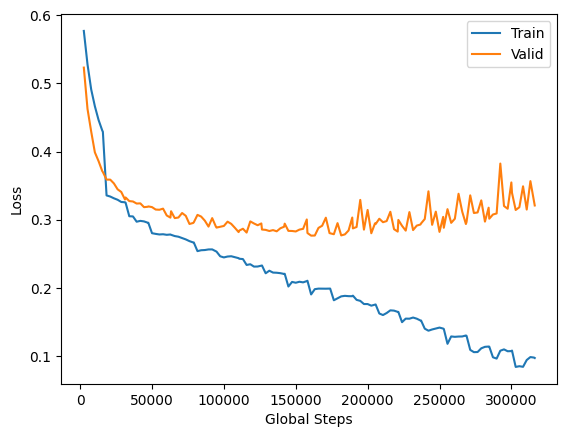

In [16]:
# test_accuracy = evaluate_RNN(model, test_loader)
plot_losses(save_dir=SAVE_DIR, metrics_save_name=SAVE_NAME)
rename_with_acc(SAVE_NAME, SAVE_DIR, test_acc)